In [1]:
import torch
import pandas as pd
from train import train
from recommender import recommend_to_user, recommend
from utils import plot_image, create_recipe_url, random_seed

In [2]:
TRAIN = False

if(TRAIN) :
    train(
        csv_file="data/interactions.csv", 
        user_id_col="user_id", item_id_col="recipe_id", rating_col="rating", 
        model_file="NeuralMF0.pt", epochs=40, lr=0.0009, batch_size=512, embedding_dim=10
    )

In [3]:

recipes = pd.read_csv('data/recipes.csv')
interactions = pd.read_csv('data/interactions.csv')

# Create a dictionary to map user and recipe ids to indices
user_to_index = {user_id: index for index, user_id in enumerate(interactions['user_id'].unique())}
recipe_to_index = {recipe_id: index for index, recipe_id in enumerate(interactions['recipe_id'].unique())}
index_to_recipe_id = {index: recipe_id for index, recipe_id in enumerate(interactions['recipe_id'].unique())}
recipe_names = recipes.set_index('id')['name'].to_dict()

random_seed(33)

# Check if CUDA is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = torch.load('NeuralMF.pt').to(device)

Top 2 recipes recommended for user 38094:
1. Name: "carrots potatoes roasted w onion and garlic", Ready In Minutes: 80, Recipe ID: 87047
https://www.food.com/recipe/carrots-potatoes-roasted-w-onion-and-garlic-87047


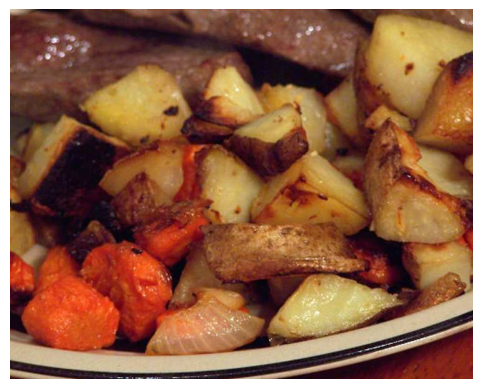

2. Name: "pina colada martini", Ready In Minutes: 3, Recipe ID: 347144
https://www.food.com/recipe/pina-colada-martini-347144


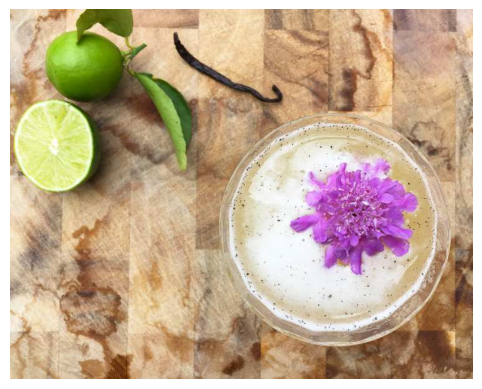

In [4]:
recipe_names = recipes.set_index('id')['name'].to_dict()
recipe_minutes = recipes.set_index('id')['minutes'].to_dict()

# Get the top recipe recommendations for a user
user_index = 0
top_n = 2
recommended_indices = recommend_to_user(model, user_index, top_n)
recommended_recipe_ids = [list(recipe_to_index.keys())[i] for i in recommended_indices]
recommended_recipe_names = [recipe_names[recipe_id] for recipe_id in recommended_recipe_ids]

print(f'Top {top_n} recipes recommended for user {list(user_to_index.keys())[user_index]}:')
for i, recipe_id in enumerate(recommended_recipe_ids, start=1):
    recipe_name = recipe_names[recipe_id]
    recipe_name = ' '.join(recipe_name.split())
    print(f'{i}. Name: \"{recipe_name}\", Ready In Minutes: {recipe_minutes[recipe_id]}, Recipe ID: {recipe_id}')
    print(create_recipe_url(recipe_id, recipe_name))
    plot_image(create_recipe_url(recipe_id, recipe_name))

In [5]:
user_id = 0
preferred_items = [ 50, 5, 954]  # Preferred item IDs
top_n = 3  # Number of top recommendations

print(f'Updated prefered recipes for user {list(user_to_index.keys())[user_index]}:')
preferred_recipe_ids = [list(recipe_to_index.keys())[i] for i in preferred_items]
for i, recipe_id in enumerate(preferred_recipe_ids):
    print(f'{i}. {recipe_names[recipe_id]}')

recommended_indices = recommend(model, user_id, preferred_items, top_n)
recommended_recipe_ids = [list(recipe_to_index.keys())[i] for i in recommended_indices]

# Print the names of the recommended recipes with indices
print(f'\nTop {top_n} recipes recommended for user {list(user_to_index.keys())[user_index]}:')
for i, recipe_id in enumerate(recommended_recipe_ids, start=1):
    recipe_name = recipe_names[recipe_id]
    print(f'{i}. Name: {recipe_name}, Ready In: {recipe_minutes[recipe_id]} minutes, Recipe ID: {recipe_id}')



Updated prefered recipes for user 38094:
0. green bean artichoke casserole
1. mexican hots
2. french silk pie  cooked

Top 3 recipes recommended for user 38094:
1. Name: baked potato toppings, Ready In: 10 minutes, Recipe ID: 85009
2. Name: devilicious cookie cake delights, Ready In: 20 minutes, Recipe ID: 44394
3. Name: white bean   green chile pepper soup, Ready In: 495 minutes, Recipe ID: 40893
